# CSCI2000U - Final Project Proposal


Group 29
Ashar Izhar, Bridget Green, Cameron Millar, Julian Finley

Data Site
https://www.kaggle.com/mazenramadan/imdb-most-popular-films-and-series
    

Description: The dataset is about the ratings of different movies and TV series on IMDB. It includes information such as;
- Name: The Name
- Date: Creation date
- Rate: IMDB's Rating
- Votes: Number of voters
- Genre: The Genre
- Duration: The Duration of the episode , film
- Type: whether it's film or series
- Certificate: The Certificate (TV-Y, PG, PG-13, etc)
- Episodes: Number of episodes for TV series
- How much adult content is present  

This data was collected  using Web Scraping. 


Getting to know your data 

In [1]:
import csv
import re
from functools import reduce
import numpy as np

def get_data_csv():
    collection = []
    with open('imdb.csv', 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
# the data    
data = get_data_csv()

In [2]:
import json

#Number of records
print("# of data records:", len (data))

#Date Range
maxYear = max(data, key=lambda item:item['Date'])
minYear = min(data, key=lambda item:item['Date'])
print ("Range in years:", (minYear['Date']), "-", (maxYear['Date']))

#Unique genres by length
uniqueGenres = set(item['Genre'] for item in data)
print("# of unique genres: ", len(uniqueGenres))

#Unique titles by length
uniqueTitles = set(item['Name'] for item in data)
print("# of unique titles: ", len(uniqueTitles))

#Unique titles by type
uniqueFilms = list(filter(lambda item: 'Film' in item['Type'], data))
uniqueSeries = list(filter(lambda item: 'Series' in item['Type'], data))
print("# of unique movies: ", len(uniqueFilms))
print("# of unique shows: ", len(uniqueSeries))

#Unique ratings by length
uniqueRatings = set(item['Rate'] for item in data)
print("# of unique ratings: ", len(uniqueRatings))

#Top 3 records
print("Top 3 records:", json.dumps(data[:3],indent=4),'\n')

# of data records: 6178
Range in years: 1922 - 2023
# of unique genres:  377
# of unique titles:  4820
# of unique movies:  4446
# of unique shows:  1732
# of unique ratings:  77
Top 3 records: [
    {
        "Name": "No Time to Die",
        "Date": "2021",
        "Rate": "7.6",
        "Votes": "107,163",
        "Genre": "Action, Adventure, Thriller",
        "Duration": "163 ",
        "Type": "Film",
        "Certificate": "PG-13",
        "Episodes": "-",
        "Nudity": "Mild",
        "Violence": "Moderate",
        "Profanity": "Mild",
        "Alcohol": "Mild",
        "Frightening": "Moderate"
    },
    {
        "Name": "The Guilty",
        "Date": "2021",
        "Rate": "6.3",
        "Votes": "64,375",
        "Genre": "Crime, Drama, Thriller",
        "Duration": "90 ",
        "Type": "Film",
        "Certificate": "R",
        "Episodes": "-",
        "Nudity": "None",
        "Violence": "None",
        "Profanity": "Severe",
        "Alcohol": "None",
        

We chose this data set because it pertains to movies and TV series, which everyone in the group is already familiar with and interested in. It also has plenty of data to work with, thus we can use the data to ask multiple different questions, and test various hypotheses. There's multiple ways we can see how one variable influenced another, and what conclusions we can come to based on the data.  

We looked at using sets like Utility Cut permits or chemical tracking data for the city of Toronto, but they either didn't have enough data to reasonably work with or weren't interesting to anyone in the group. There was not many questions to be asked, or conclusions to come to. 

Questions:
   - Which genres of movie perform the best across different years?
   - Does the date influence the rating of a movie or TV show??
   - Do TV series or movies perform better? How does this differ over the years? 
   - How does the amount of adult content influence the ratings of a movie?
   - Has there been an increase in any genres over the years? If so, could the ratings have had an influence over this?

We can expect to apply covariance, comparisons and correlation between several different data points.

This could be used to see how trends have changed throughout the years in regards to movies and TV shows. What genres have been more popular and in what years? Are movies/TV shows becoming longer or shorter? Were ratings better back in the day, or now? How could the amount of votes influence the rating of a movie? Are people becoming more critical now, or were people more critical back in the day? 
All these questions can also lead to further questions, such as how and why trends may have changed regarding one of the variables, and how much influence does public opinion have over the production of movies and TV shows. 


In [3]:
import pandas as pd


import csv

from functools import reduce
import numpy as np
import calendar
import string
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [4]:
df = pd.DataFrame(data)
df


,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
6174,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107,Film,Passed,-,None,Mild,None,Mild,Mild
6175,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117,Film,R,-,Severe,Moderate,Severe,Severe,Severe
6176,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100,Film,PG-13,-,None,None,Mild,Moderate,None


In order to see which genre is most popular, a good place to start is to see how much of each genre was released every year. 

In [5]:
df['Genre'].value_counts()[5:]

Action, Crime, Drama            171
Comedy, Drama, Romance          156
Animation, Adventure, Comedy    154
Comedy, Romance                 148
Action, Adventure, Sci-Fi       144
                               ... 
Action, Thriller, War             1
Comedy, Crime, Musical            1
Short, Drama, Romance             1
Animation                         1
Drama, Fantasy, Thriller          1
Name: Genre, Length: 372, dtype: int64

In order to get an accurate idea of how popular each genre was, we'll need to seperate any combination of genres from each other, as well as drop any duplicates. 

In [200]:
df = df.drop_duplicates() 

In [201]:
def genreGroup(n):
    
    df3=df[df['Genre'].str.contains(n)==True]
    
    return df3

The fuction above returns every row of the original dataframe that contains a specified genre, so for each genre, we can also look at the ratings, the number of votes, and the dates. 
To get an idea of how often a genre gets published, and how that changes over the years, a line plot is the best option. That way, we can observe and increase or decrease over a set of years. 



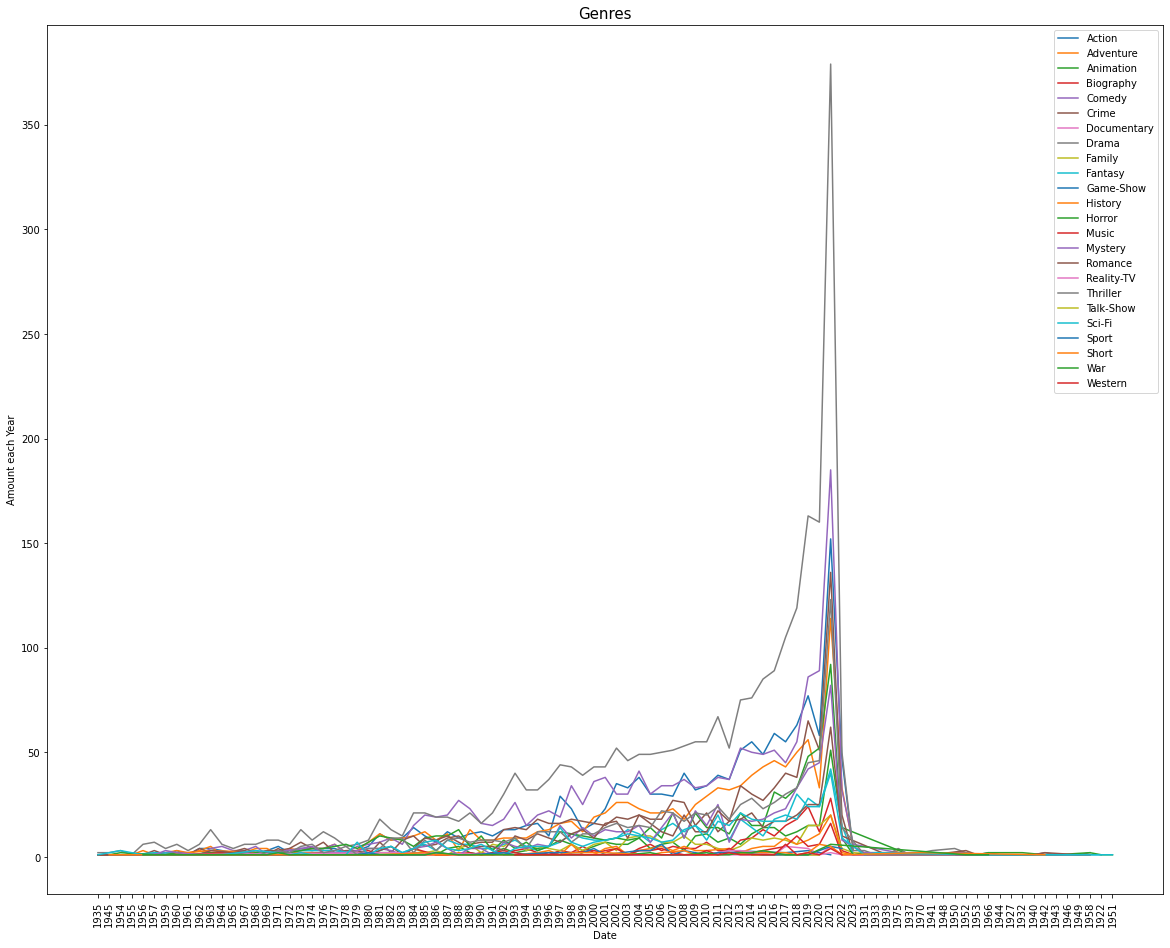

In [202]:


plt.figure(figsize=(20,16))
sns.lineplot(x=((genreGroup("Action")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Action")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Adventure")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Adventure")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Animation")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Animation")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Biography")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Biography")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Comedy")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Comedy")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Crime")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Crime")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Documentary")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Documentary")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Drama")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Drama")).groupby(['Date'])['Genre'].count()).values)


sns.lineplot(x=((genreGroup("Family")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Family")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Fantasy")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Fantasy")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Game-Show")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Game-Show")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("History")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("History")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Horror")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Horror")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Music")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Music")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Mystery")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Mystery")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Romance")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Romance")).groupby(['Date'])['Genre'].count()).values)


sns.lineplot(x=((genreGroup("Reality-TV")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Reality-TV")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Thriller")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Thriller")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Talk-Show")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Talk-Show")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Sci-Fi")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Sci-Fi")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Sport")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Sport")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("War")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("War")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Western")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Western")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Short")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Short")).groupby(['Date'])['Genre'].count()).values)



plt.title("Genres", size=15)
plt.ylabel("Amount each Year")
plt.legend(["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Documentary", "Drama", "Family", "Fantasy", "Game-Show", "History", "Horror", "Music", "Mystery", "Romance", "Reality-TV", "Thriller", "Talk-Show", "Sci-Fi", "Sport", "Short",  "War", "Western"])

plt.xticks(size=10, rotation=90)
plt.show()

The above graph shows the progression of every genre throught the years. 
Something that should be noted while reading the graph is that following the year 2023, the year sets back to 1931. After 1931, it shows years that were seemingly skipped over in the leftmost side of the graph. Fortunately, this seems to line up with what can already be seen on the graph.
Not many shows or films are shown to have been released in the earlier years, so this does affect the data of the early years. For years where only one film or show was released, it would obvioulsy show that genre as being the most popular of that year. 
That being said, there does not appear to be much in terms of outliers. 
From the graph, we can see that the three most popular genres, Drama, Comedy, and Action, follow a trend of starting small, and then shooting up as the years go on.

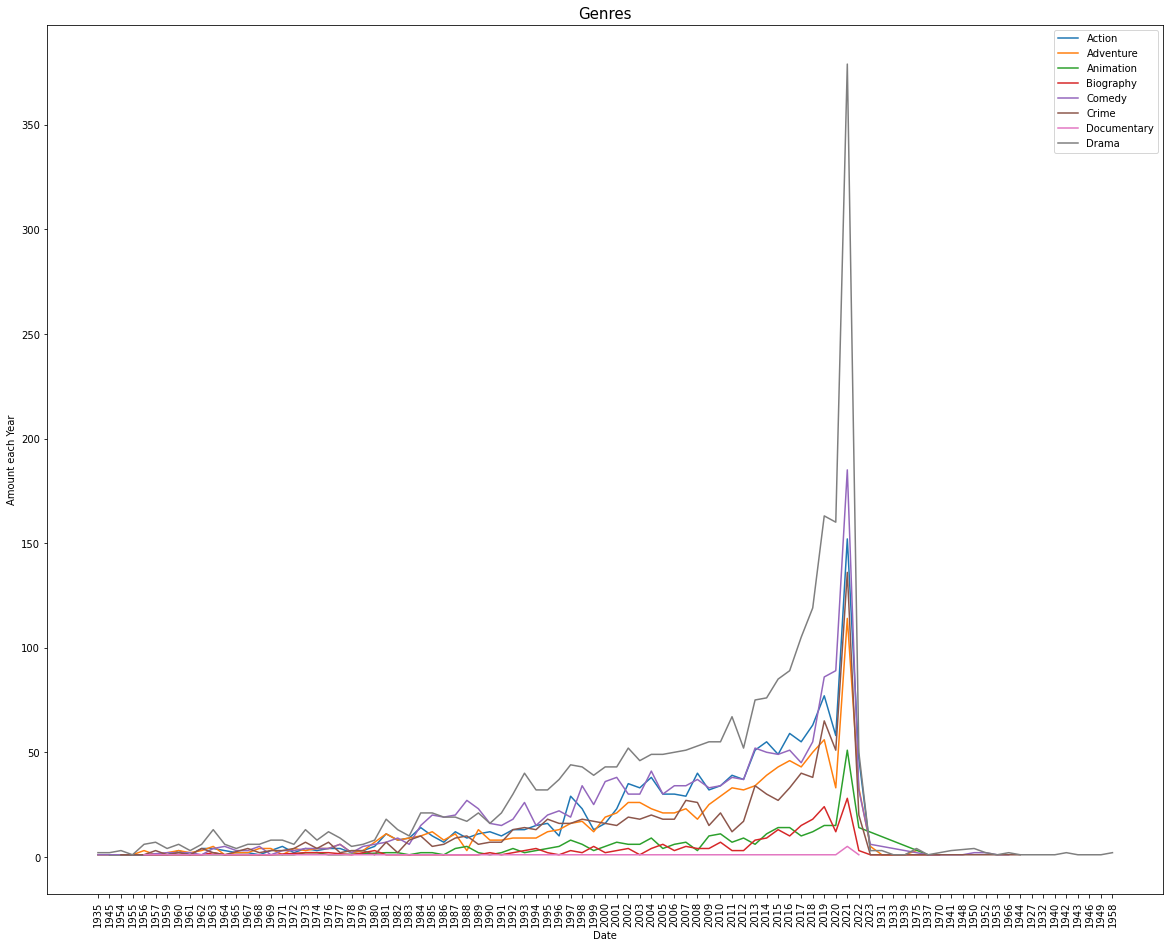

In [203]:



plt.figure(figsize=(20,16))
sns.lineplot(x=((genreGroup("Action")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Action")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Adventure")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Adventure")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Animation")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Animation")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Biography")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Biography")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Comedy")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Comedy")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Crime")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Crime")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Documentary")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Documentary")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Drama")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Drama")).groupby(['Date'])['Genre'].count()).values)





plt.title("Genres", size=15)
plt.ylabel("Amount each Year")
plt.legend(["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Documentary", "Drama"])

plt.xticks(size=10, rotation=90)
plt.show()

Splitting up the graph in three parts makes it easier to do an analysis of the data. 

Here, we can observe that Drama, Comedy, and Action all started small, and had instances of passing each other in popularity until 1990 where Drama became consistently the most popular. 

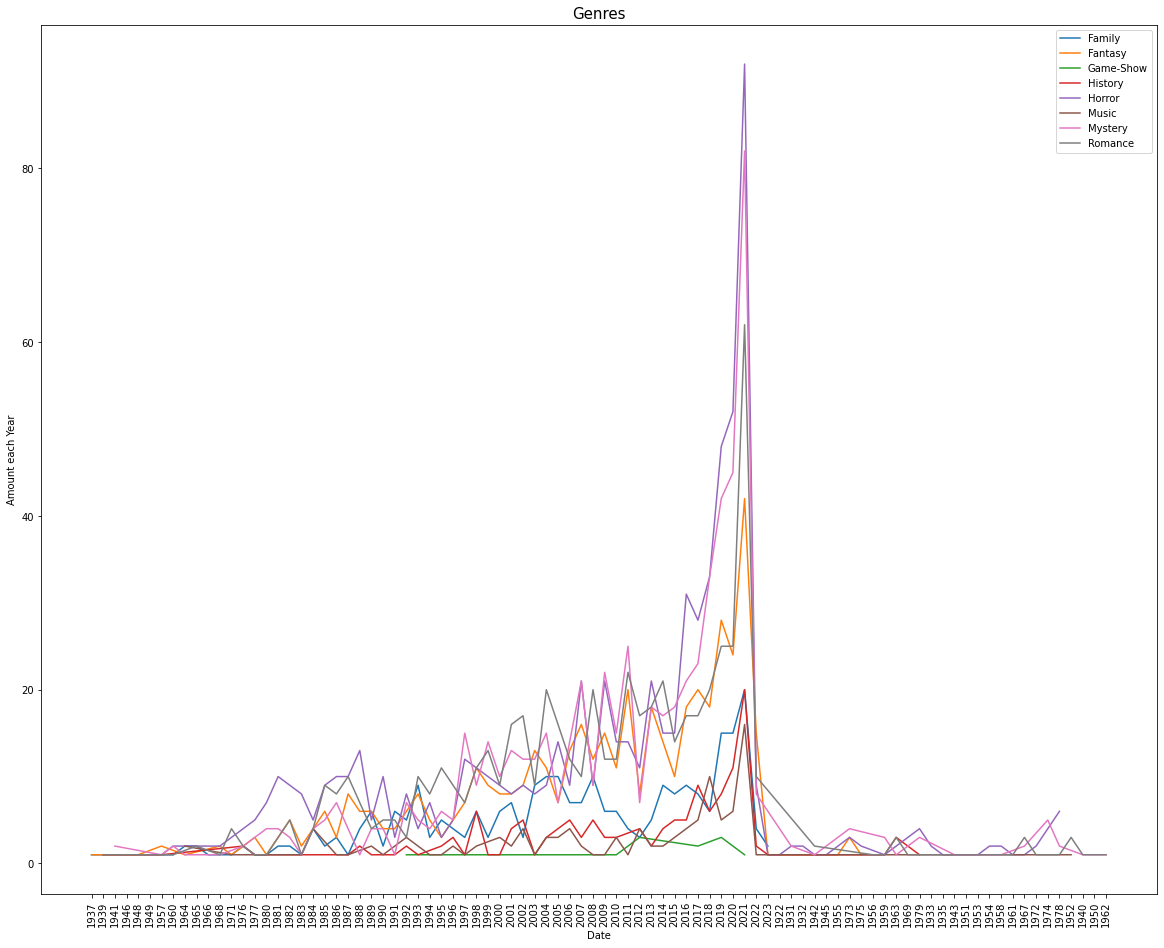

In [204]:


plt.figure(figsize=(20,16))
sns.lineplot(x=((genreGroup("Family")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Family")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Fantasy")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Fantasy")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Game-Show")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Game-Show")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("History")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("History")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Horror")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Horror")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Music")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Music")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Mystery")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Mystery")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Romance")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Romance")).groupby(['Date'])['Genre'].count()).values)



plt.title("Genres", size=15)
plt.ylabel("Amount each Year")
plt.legend(["Family", "Fantasy", "Game-Show", "History", "Horror", "Music", "Mystery", "Romance"])

plt.xticks(size=10, rotation=90)
plt.show()

Part 2 is more irratic in terms of what has been the most popular. The Horror genre appears to frequently top the other genres shown here, but we can see instances where it is over taken by Romance and Mystery. We can also see that Game Shows had a short run from 1991 to 2021. Outside of these years, seemingly no Game Show media has been released. 

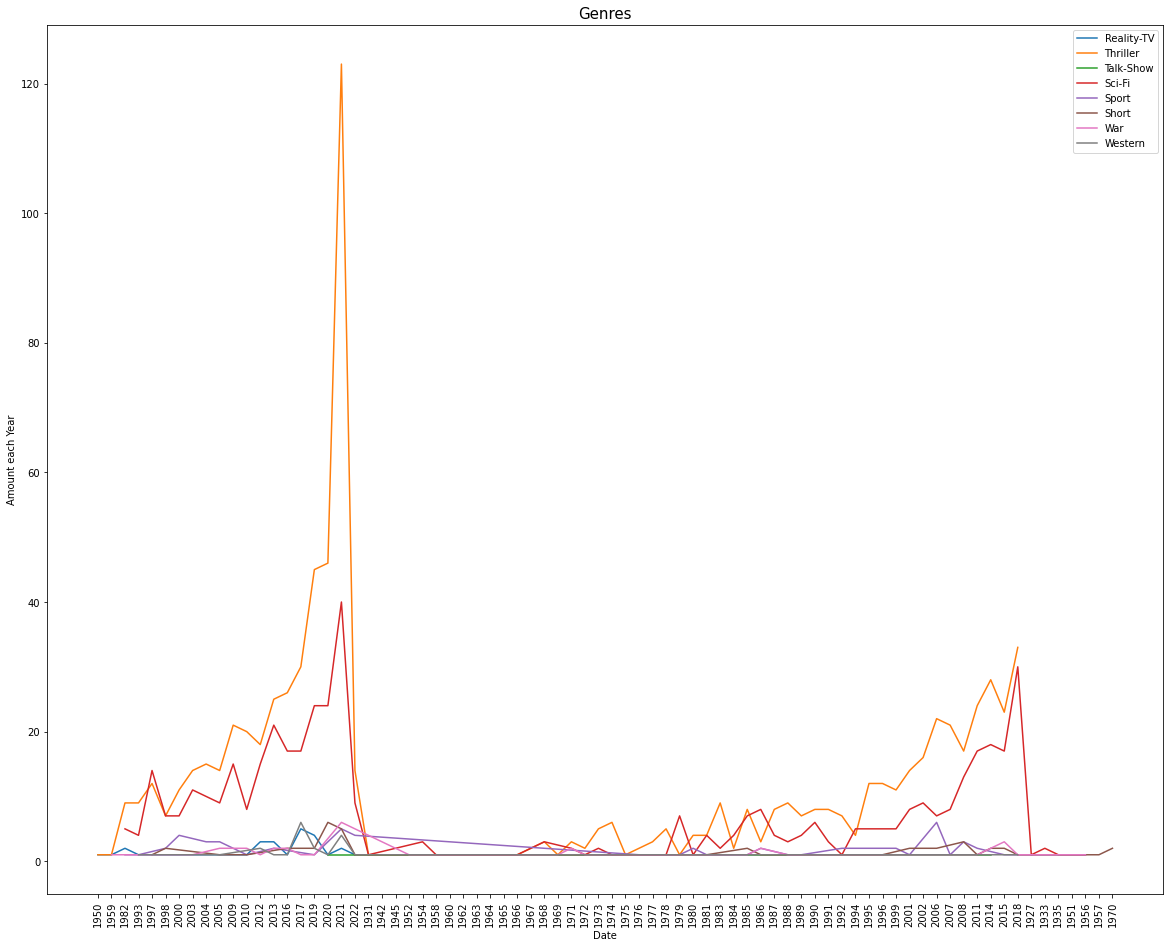

In [205]:



plt.figure(figsize=(20,16))

sns.lineplot(x=((genreGroup("Reality-TV")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Reality-TV")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Thriller")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Thriller")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Talk-Show")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Talk-Show")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Sci-Fi")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Sci-Fi")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Sport")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Sport")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("War")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("War")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Western")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Western")).groupby(['Date'])['Genre'].count()).values)
sns.lineplot(x=((genreGroup("Short")).groupby(['Date'])['Genre'].count()).index, y=((genreGroup("Short")).groupby(['Date'])['Genre'].count()).values)



plt.title("Genres", size=15)
plt.ylabel("Amount each Year")
plt.legend(["Reality-TV", "Thriller", "Talk-Show", "Sci-Fi", "Sport", "Short" ,"War", "Western"])

plt.xticks(size=10, rotation=90)
plt.show()

Finally, we can observe some of the least popular genres. Thrillers and Sci-Fi can be seen to have spikes in popularity, and do not follow any trend of becoming released more frequently over the years. 

Next, let's look at how these genres were rated, starting with the most popular, Drama, Comedy, and Action

<AxesSubplot:xlabel='Date'>

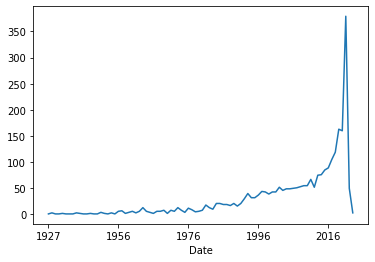

In [206]:


drama=(genreGroup("Drama"))
t1=drama.groupby('Date')['Rate'].count()
t1.plot()

<AxesSubplot:xlabel='Date'>

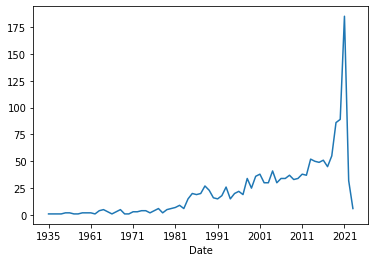

In [207]:
comedy=(genreGroup("Comedy"))
t2=comedy.groupby('Date')['Rate'].count()
t2.plot()

<AxesSubplot:xlabel='Date'>

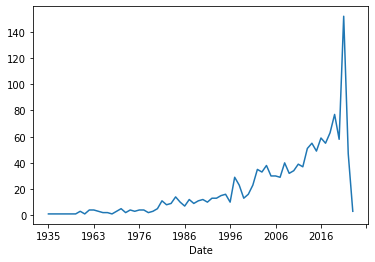

In [208]:
action=(genreGroup("Action"))
t3=action.groupby('Date')['Rate'].count()
t3.plot()

All three show a correlation with their ratings and the amount of releases. The most released genres have the highest total ratings. 
But what about the least popular? 

<AxesSubplot:xlabel='Date'>

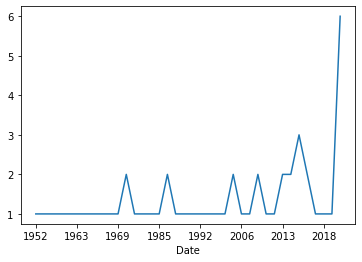

In [209]:
western=(genreGroup("Western"))
t4=western.groupby('Date')['Rate'].count()
t4.plot()

<AxesSubplot:xlabel='Date'>

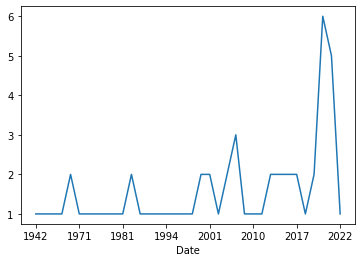

In [210]:
war=(genreGroup("War"))
t5=war.groupby('Date')['Rate'].count()
t5.plot()

Here, we can observe something notable, especially when compared next to the graph showing how often each genre was released. For instance, for Westerns in 2017, the ratings were decreasing. Looking at the amount of times a Western was published after 2017, there was a decrease. However, after a much higher total rating following 2018, we can see an increase in Westerns being made in 2019. 

We can also look at the votes to view audience engagement with the movie and see if that correlates with the popularity of the genres. 

<AxesSubplot:xlabel='Date'>

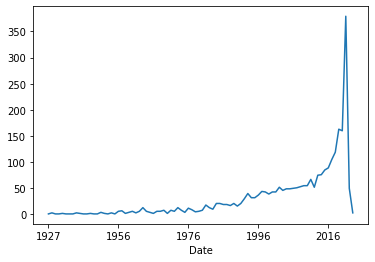

In [211]:

t1=drama.groupby('Date')['Votes'].count()
t1.plot()

<AxesSubplot:xlabel='Date'>

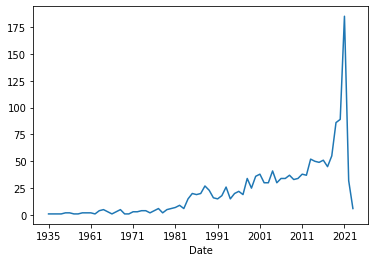

In [212]:
t2=comedy.groupby('Date')['Votes'].count()
t2.plot()

<AxesSubplot:xlabel='Date'>

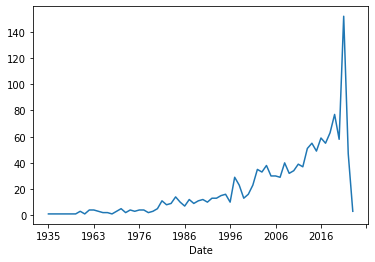

In [213]:
t3=action.groupby('Date')['Votes'].count()
t3.plot()

Here, the votes correlate with the amount of times each genre was published. Something that can be observed is that every increase and decrease of votes and ratings approximately matches the amount of publishings the following year. For comedy in 2015, there was a decrease in votes and total overall ratings. 2016 and 2017 saw less comedies being made, but after 2017 where there begins to be an increase in ratings and votes, 2018 sees more comedies being released.  

<AxesSubplot:xlabel='Date'>

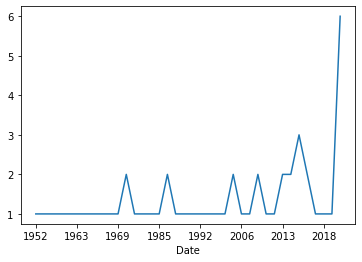

In [214]:
t4=western.groupby('Date')['Votes'].count()
t4.plot()

<AxesSubplot:xlabel='Date'>

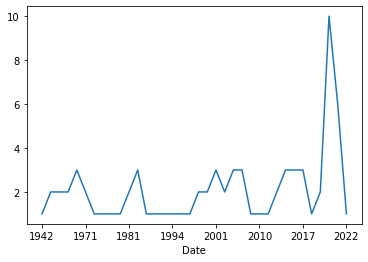

In [189]:
t5=war.groupby('Date')['Votes'].count()
t5.plot()

Here, we can see that the genre that got released the least got very few votes. The War genre had an increase in releases following 2019, but was in a decrease during 2022, where it got almost no votes at all. It started to get more votes a little before 1981, and we can see that War movies were starting to release again in 1985 briefly, but we can see that following its' increase to a little after 1981, the votes dropped again, as did the releases of the War genre. 

In conclusion, it does appear that ratings correlate with the popularity of each genre. 
It also seems that both votes and ratings have an influence in what genres get released every year. 